In [1]:

!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib


In [2]:
!pip install pyttsx3

In [1]:
from easygui import *

In [2]:
from PIL import Image, ImageTk
from itertools import count
import tkinter as tk

In [3]:
import pyttsx3

In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


In [5]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False                 
    results = model.process(image)                
    image.flags.writeable = True                    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results 

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [8]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('SLR', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

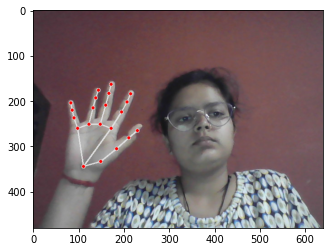

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
results

mediapipe.python.solution_base.SolutionOutputs

In [14]:
results.right_hand_landmarks.landmark[0].y

0.7187038660049438

In [15]:
for res in results.right_hand_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])

In [16]:
test

array([ 0.13015358,  0.42705455, -0.0498202 ,  0.        ])

In [17]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
rh

array([ 1.74540699e-01,  7.18703866e-01,  4.11546608e-07,  2.34282196e-01,
        6.93900466e-01, -2.01697052e-02,  2.87888944e-01,  6.36264920e-01,
       -2.58151330e-02,  3.29984844e-01,  5.86782575e-01, -3.06059569e-02,
        3.59981269e-01,  5.54013789e-01, -3.52620967e-02,  2.69352734e-01,
        5.41861355e-01, -1.33790141e-02,  3.05418253e-01,  4.68083978e-01,
       -2.59908326e-02,  3.24065924e-01,  4.21659291e-01, -3.68822403e-02,
        3.36925209e-01,  3.84668380e-01, -4.46233042e-02,  2.31623858e-01,
        5.23635805e-01, -1.54471993e-02,  2.50524312e-01,  4.36972857e-01,
       -2.51041576e-02,  2.61430472e-01,  3.82816792e-01, -3.65735106e-02,
        2.69096822e-01,  3.41653407e-01, -4.50206548e-02,  1.93155795e-01,
        5.24709642e-01, -2.03964654e-02,  2.06350386e-01,  4.49796975e-01,
       -3.11521385e-02,  2.16175497e-01,  4.03756350e-01, -4.20989916e-02,
        2.25954458e-01,  3.67248297e-01, -5.04144505e-02,  1.53193578e-01,
        5.42728245e-01, -

In [19]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [21]:
result_test = extract_keypoints(results)

In [22]:
result_test

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [23]:
np.save('0', result_test)

In [24]:
np.load('0.npy')

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [25]:
extract_keypoints(results).shape

(126,)

In [26]:
21*3+21*3

126

In [27]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Slr_Dataset') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])


no_sequences = 50


sequence_length = 50

In [28]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [29]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('SLR WEB CAM', image)
                    cv2.waitKey(200)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('SLR WEB CAM', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [33]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [34]:
np.array(sequences).shape

(150, 50, 126)

In [35]:
np.array(labels).shape

(150,)

In [36]:
X = np.array(sequences)

In [37]:
X.shape

(150, 50, 126)

In [38]:
y = to_categorical(labels).astype(int)


In [39]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [41]:
y_test.shape

(8, 3)

In [42]:
y_train.shape

(142, 3)

In [43]:
X_test.shape

(8, 50, 126)

In [44]:
X_train.shape

(142, 50, 126)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [46]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [47]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(50,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [48]:
res=[.7,0.2,0.1]

In [49]:
actions[np.argmax(res)]

'hello'

In [50]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=2500, callbacks=[tb_callback])

Epoch 1/2500
5/5 [==============================] - 3s 181ms/step - loss: 1.0638 - categorical_accuracy: 0.5493
Epoch 2/2500
5/5 [==============================] - 0s 71ms/step - loss: 0.7255 - categorical_accuracy: 0.6620
Epoch 3/2500
5/5 [==============================] - 0s 72ms/step - loss: 100.5692 - categorical_accuracy: 0.5141
Epoch 4/2500
5/5 [==============================] - 0s 70ms/step - loss: 0.7099 - categorical_accuracy: 0.6761
Epoch 5/2500
5/5 [==============================] - 0s 71ms/step - loss: 12.7460 - categorical_accuracy: 0.6197
Epoch 6/2500
5/5 [==============================] - 0s 69ms/step - loss: 17.6154 - categorical_accuracy: 0.6338
Epoch 7/2500
5/5 [==============================] - 0s 70ms/step - loss: 36.7489 - categorical_accuracy: 0.5352
Epoch 8/2500
5/5 [==============================] - 0s 69ms/step - loss: 12.6826 - categorical_accuracy: 0.3944
Epoch 9/2500
5/5 [==============================] - 0s 70ms/step - loss: 30.6071 - categorical_accuracy: 

5/5 [==============================] - 0s 71ms/step - loss: 471.3654 - categorical_accuracy: 0.3380
Epoch 73/2500
5/5 [==============================] - 0s 68ms/step - loss: 551.2646 - categorical_accuracy: 0.3169
Epoch 74/2500
5/5 [==============================] - 0s 73ms/step - loss: 1415.0255 - categorical_accuracy: 0.2254
Epoch 75/2500
5/5 [==============================] - 0s 69ms/step - loss: 1122.4365 - categorical_accuracy: 0.4225
Epoch 76/2500
5/5 [==============================] - 0s 66ms/step - loss: 632.9905 - categorical_accuracy: 0.3521
Epoch 77/2500
5/5 [==============================] - 0s 69ms/step - loss: 885.5155 - categorical_accuracy: 0.4366
Epoch 78/2500
5/5 [==============================] - 0s 64ms/step - loss: 1254.4034 - categorical_accuracy: 0.3099
Epoch 79/2500
5/5 [==============================] - 0s 71ms/step - loss: 768.8366 - categorical_accuracy: 0.2676
Epoch 80/2500
5/5 [==============================] - 0s 68ms/step - loss: 740.2173 - categorical_ac

5/5 [==============================] - 0s 69ms/step - loss: 0.6218 - categorical_accuracy: 0.7606
Epoch 145/2500
5/5 [==============================] - 0s 65ms/step - loss: 0.9516 - categorical_accuracy: 0.7254
Epoch 146/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.6789 - categorical_accuracy: 0.7676
Epoch 147/2500
5/5 [==============================] - 0s 66ms/step - loss: 0.8099 - categorical_accuracy: 0.7394
Epoch 148/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.5780 - categorical_accuracy: 0.7958
Epoch 149/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.4728 - categorical_accuracy: 0.8099
Epoch 150/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.4666 - categorical_accuracy: 0.8028
Epoch 151/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.4414 - categorical_accuracy: 0.8028
Epoch 152/2500
5/5 [==============================] - 0s 65ms/step - loss: 0.4443 - categorical_accuracy: 0.816

5/5 [==============================] - 0s 68ms/step - loss: 0.1928 - categorical_accuracy: 0.9437
Epoch 217/2500
5/5 [==============================] - 0s 73ms/step - loss: 0.1899 - categorical_accuracy: 0.9437
Epoch 218/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.1883 - categorical_accuracy: 0.9437
Epoch 219/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.1879 - categorical_accuracy: 0.9437
Epoch 220/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.1855 - categorical_accuracy: 0.9437
Epoch 221/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.1845 - categorical_accuracy: 0.9437
Epoch 222/2500
5/5 [==============================] - 0s 66ms/step - loss: 0.1844 - categorical_accuracy: 0.9437
Epoch 223/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.1830 - categorical_accuracy: 0.9437
Epoch 224/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.1799 - categorical_accuracy: 0.943

5/5 [==============================] - 0s 68ms/step - loss: 0.1118 - categorical_accuracy: 0.9718
Epoch 289/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.1112 - categorical_accuracy: 0.9718
Epoch 290/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.1102 - categorical_accuracy: 0.9718
Epoch 291/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.1091 - categorical_accuracy: 0.9718
Epoch 292/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.1089 - categorical_accuracy: 0.9718
Epoch 293/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.1087 - categorical_accuracy: 0.9718
Epoch 294/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.1078 - categorical_accuracy: 0.9718
Epoch 295/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.1085 - categorical_accuracy: 0.9718
Epoch 296/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.1080 - categorical_accuracy: 0.971

5/5 [==============================] - 0s 69ms/step - loss: 0.0782 - categorical_accuracy: 0.9859
Epoch 361/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0777 - categorical_accuracy: 0.9859
Epoch 362/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0770 - categorical_accuracy: 0.9859
Epoch 363/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.0764 - categorical_accuracy: 0.9859
Epoch 364/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.0759 - categorical_accuracy: 0.9859
Epoch 365/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0755 - categorical_accuracy: 0.9859
Epoch 366/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0751 - categorical_accuracy: 0.9859
Epoch 367/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0747 - categorical_accuracy: 0.9859
Epoch 368/2500
5/5 [==============================] - 0s 71ms/step - loss: 0.0745 - categorical_accuracy: 0.985

5/5 [==============================] - 0s 79ms/step - loss: 0.0588 - categorical_accuracy: 0.9859
Epoch 433/2500
5/5 [==============================] - 0s 79ms/step - loss: 0.0587 - categorical_accuracy: 0.9859
Epoch 434/2500
5/5 [==============================] - 0s 79ms/step - loss: 0.0586 - categorical_accuracy: 0.9859
Epoch 435/2500
5/5 [==============================] - 0s 79ms/step - loss: 0.0584 - categorical_accuracy: 0.9859
Epoch 436/2500
5/5 [==============================] - 0s 80ms/step - loss: 0.0587 - categorical_accuracy: 0.9859
Epoch 437/2500
5/5 [==============================] - 0s 78ms/step - loss: 0.0586 - categorical_accuracy: 0.9859
Epoch 438/2500
5/5 [==============================] - 0s 75ms/step - loss: 0.0585 - categorical_accuracy: 0.9859
Epoch 439/2500
5/5 [==============================] - 0s 76ms/step - loss: 0.0579 - categorical_accuracy: 0.9859
Epoch 440/2500
5/5 [==============================] - 0s 79ms/step - loss: 0.0584 - categorical_accuracy: 0.985

5/5 [==============================] - 0s 68ms/step - loss: 0.0478 - categorical_accuracy: 0.9930
Epoch 505/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0471 - categorical_accuracy: 0.9930
Epoch 506/2500
5/5 [==============================] - 0s 74ms/step - loss: 0.0469 - categorical_accuracy: 0.9930
Epoch 507/2500
5/5 [==============================] - 0s 66ms/step - loss: 0.0499 - categorical_accuracy: 0.9859
Epoch 508/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0488 - categorical_accuracy: 0.9930
Epoch 509/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0494 - categorical_accuracy: 0.9930
Epoch 510/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0485 - categorical_accuracy: 0.9930
Epoch 511/2500
5/5 [==============================] - 0s 71ms/step - loss: 0.0471 - categorical_accuracy: 0.9930
Epoch 512/2500
5/5 [==============================] - 0s 72ms/step - loss: 0.0475 - categorical_accuracy: 0.993

5/5 [==============================] - 0s 66ms/step - loss: 0.0418 - categorical_accuracy: 0.9930
Epoch 577/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0710 - categorical_accuracy: 0.9789
Epoch 578/2500
5/5 [==============================] - 0s 73ms/step - loss: 0.0437 - categorical_accuracy: 0.9930
Epoch 579/2500
5/5 [==============================] - 0s 65ms/step - loss: 0.0424 - categorical_accuracy: 0.9930
Epoch 580/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0469 - categorical_accuracy: 0.9859
Epoch 581/2500
5/5 [==============================] - 0s 73ms/step - loss: 0.0425 - categorical_accuracy: 0.9930
Epoch 582/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.0600 - categorical_accuracy: 0.9859
Epoch 583/2500
5/5 [==============================] - 0s 71ms/step - loss: 0.0583 - categorical_accuracy: 0.9859
Epoch 584/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0530 - categorical_accuracy: 0.985

5/5 [==============================] - 0s 73ms/step - loss: 0.0309 - categorical_accuracy: 0.9930
Epoch 649/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.0314 - categorical_accuracy: 0.9930
Epoch 650/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.0309 - categorical_accuracy: 0.9930
Epoch 651/2500
5/5 [==============================] - 0s 72ms/step - loss: 0.0322 - categorical_accuracy: 0.9859
Epoch 652/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0383 - categorical_accuracy: 0.9930
Epoch 653/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0380 - categorical_accuracy: 0.9930
Epoch 654/2500
5/5 [==============================] - 0s 71ms/step - loss: 0.0325 - categorical_accuracy: 0.9930
Epoch 655/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0341 - categorical_accuracy: 0.9930
Epoch 656/2500
5/5 [==============================] - 0s 71ms/step - loss: 0.0406 - categorical_accuracy: 0.985

5/5 [==============================] - 0s 77ms/step - loss: 0.1819 - categorical_accuracy: 0.9507
Epoch 721/2500
5/5 [==============================] - 0s 73ms/step - loss: 0.1767 - categorical_accuracy: 0.9437
Epoch 722/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.2353 - categorical_accuracy: 0.8944
Epoch 723/2500
5/5 [==============================] - 0s 71ms/step - loss: 0.2191 - categorical_accuracy: 0.9225
Epoch 724/2500
5/5 [==============================] - 0s 73ms/step - loss: 0.2189 - categorical_accuracy: 0.9155
Epoch 725/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.2078 - categorical_accuracy: 0.9155
Epoch 726/2500
5/5 [==============================] - 0s 73ms/step - loss: 0.1897 - categorical_accuracy: 0.9296
Epoch 727/2500
5/5 [==============================] - 0s 75ms/step - loss: 0.1738 - categorical_accuracy: 0.9366
Epoch 728/2500
5/5 [==============================] - 0s 73ms/step - loss: 0.1621 - categorical_accuracy: 0.936

5/5 [==============================] - 0s 71ms/step - loss: 0.0365 - categorical_accuracy: 0.9859
Epoch 793/2500
5/5 [==============================] - 0s 73ms/step - loss: 0.0362 - categorical_accuracy: 0.9789
Epoch 794/2500
5/5 [==============================] - 0s 74ms/step - loss: 0.0374 - categorical_accuracy: 0.9789
Epoch 795/2500
5/5 [==============================] - 0s 72ms/step - loss: 0.0366 - categorical_accuracy: 0.9789
Epoch 796/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0430 - categorical_accuracy: 0.9859
Epoch 797/2500
5/5 [==============================] - 0s 76ms/step - loss: 0.0369 - categorical_accuracy: 0.9859
Epoch 798/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0459 - categorical_accuracy: 0.9859
Epoch 799/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0514 - categorical_accuracy: 0.9789
Epoch 800/2500
5/5 [==============================] - 0s 83ms/step - loss: 0.0734 - categorical_accuracy: 0.971

5/5 [==============================] - 0s 76ms/step - loss: 0.2110 - categorical_accuracy: 0.9296
Epoch 865/2500
5/5 [==============================] - 0s 74ms/step - loss: 0.2004 - categorical_accuracy: 0.9296
Epoch 866/2500
5/5 [==============================] - 0s 71ms/step - loss: 0.2040 - categorical_accuracy: 0.9225
Epoch 867/2500
5/5 [==============================] - 0s 74ms/step - loss: 0.1950 - categorical_accuracy: 0.9225
Epoch 868/2500
5/5 [==============================] - 0s 71ms/step - loss: 0.1893 - categorical_accuracy: 0.9225
Epoch 869/2500
5/5 [==============================] - 0s 72ms/step - loss: 0.1854 - categorical_accuracy: 0.9296
Epoch 870/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.1814 - categorical_accuracy: 0.9366
Epoch 871/2500
5/5 [==============================] - 0s 71ms/step - loss: 0.1787 - categorical_accuracy: 0.9366
Epoch 872/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.1743 - categorical_accuracy: 0.936

5/5 [==============================] - 0s 69ms/step - loss: 0.0448 - categorical_accuracy: 0.9789
Epoch 937/2500
5/5 [==============================] - 0s 70ms/step - loss: 0.0443 - categorical_accuracy: 0.9789
Epoch 938/2500
5/5 [==============================] - 0s 73ms/step - loss: 0.0458 - categorical_accuracy: 0.9789
Epoch 939/2500
5/5 [==============================] - 0s 71ms/step - loss: 0.0390 - categorical_accuracy: 0.9930
Epoch 940/2500
5/5 [==============================] - 0s 74ms/step - loss: 0.0381 - categorical_accuracy: 0.9859
Epoch 941/2500
5/5 [==============================] - 0s 75ms/step - loss: 0.0387 - categorical_accuracy: 0.9859
Epoch 942/2500
5/5 [==============================] - 0s 75ms/step - loss: 0.0373 - categorical_accuracy: 0.9859
Epoch 943/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0357 - categorical_accuracy: 0.9930
Epoch 944/2500
5/5 [==============================] - 0s 79ms/step - loss: 0.0349 - categorical_accuracy: 0.993

5/5 [==============================] - 0s 76ms/step - loss: 0.0158 - categorical_accuracy: 0.9930
Epoch 1009/2500
5/5 [==============================] - 0s 72ms/step - loss: 0.0155 - categorical_accuracy: 0.9930
Epoch 1010/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0155 - categorical_accuracy: 0.9930
Epoch 1011/2500
5/5 [==============================] - 0s 73ms/step - loss: 0.0150 - categorical_accuracy: 0.9930
Epoch 1012/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0155 - categorical_accuracy: 0.9930
Epoch 1013/2500
5/5 [==============================] - 0s 73ms/step - loss: 0.0153 - categorical_accuracy: 0.9930
Epoch 1014/2500
5/5 [==============================] - 0s 71ms/step - loss: 0.0145 - categorical_accuracy: 0.9930
Epoch 1015/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0142 - categorical_accuracy: 0.9930
Epoch 1016/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.0139 - categorical_accurac

5/5 [==============================] - 0s 71ms/step - loss: 0.0058 - categorical_accuracy: 1.0000
Epoch 1081/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.0058 - categorical_accuracy: 1.0000
Epoch 1082/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 1083/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0056 - categorical_accuracy: 1.0000
Epoch 1084/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 1085/2500
5/5 [==============================] - 0s 66ms/step - loss: 0.0054 - categorical_accuracy: 1.0000
Epoch 1086/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.0054 - categorical_accuracy: 1.0000
Epoch 1087/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 1088/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.0053 - categorical_accurac

5/5 [==============================] - 0s 67ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 1153/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 1154/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 1155/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 1156/2500
5/5 [==============================] - 0s 69ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 1157/2500
5/5 [==============================] - 0s 67ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 1158/2500
5/5 [==============================] - 0s 66ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 1159/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 1160/2500
5/5 [==============================] - 0s 68ms/step - loss: 0.0020 - categorical_accurac

5/5 [==============================] - 0s 71ms/step - loss: 9.3585e-04 - categorical_accuracy: 1.0000
Epoch 1224/2500
5/5 [==============================] - 0s 75ms/step - loss: 9.1966e-04 - categorical_accuracy: 1.0000
Epoch 1225/2500
5/5 [==============================] - 0s 69ms/step - loss: 9.1395e-04 - categorical_accuracy: 1.0000
Epoch 1226/2500
5/5 [==============================] - 0s 75ms/step - loss: 9.0101e-04 - categorical_accuracy: 1.0000
Epoch 1227/2500
5/5 [==============================] - 0s 74ms/step - loss: 8.9278e-04 - categorical_accuracy: 1.0000
Epoch 1228/2500
5/5 [==============================] - 0s 71ms/step - loss: 8.8403e-04 - categorical_accuracy: 1.0000
Epoch 1229/2500
5/5 [==============================] - 0s 75ms/step - loss: 8.7557e-04 - categorical_accuracy: 1.0000
Epoch 1230/2500
5/5 [==============================] - 0s 71ms/step - loss: 8.6410e-04 - categorical_accuracy: 1.0000
Epoch 1231/2500
5/5 [==============================] - 0s 83ms/step - lo

5/5 [==============================] - 0s 69ms/step - loss: 4.7184e-04 - categorical_accuracy: 1.0000
Epoch 1293/2500
5/5 [==============================] - 0s 66ms/step - loss: 4.6786e-04 - categorical_accuracy: 1.0000
Epoch 1294/2500
5/5 [==============================] - 0s 66ms/step - loss: 4.6463e-04 - categorical_accuracy: 1.0000
Epoch 1295/2500
5/5 [==============================] - 0s 68ms/step - loss: 4.6149e-04 - categorical_accuracy: 1.0000
Epoch 1296/2500
5/5 [==============================] - 0s 69ms/step - loss: 4.5809e-04 - categorical_accuracy: 1.0000
Epoch 1297/2500
5/5 [==============================] - 0s 69ms/step - loss: 4.5470e-04 - categorical_accuracy: 1.0000
Epoch 1298/2500
5/5 [==============================] - 0s 66ms/step - loss: 4.5229e-04 - categorical_accuracy: 1.0000
Epoch 1299/2500
5/5 [==============================] - 0s 68ms/step - loss: 4.4676e-04 - categorical_accuracy: 1.0000
Epoch 1300/2500
5/5 [==============================] - 0s 67ms/step - lo

5/5 [==============================] - 0s 66ms/step - loss: 2.9406e-04 - categorical_accuracy: 1.0000
Epoch 1362/2500
5/5 [==============================] - 0s 67ms/step - loss: 2.9198e-04 - categorical_accuracy: 1.0000
Epoch 1363/2500
5/5 [==============================] - 0s 67ms/step - loss: 2.8998e-04 - categorical_accuracy: 1.0000
Epoch 1364/2500
5/5 [==============================] - 0s 69ms/step - loss: 2.8908e-04 - categorical_accuracy: 1.0000
Epoch 1365/2500
5/5 [==============================] - 0s 70ms/step - loss: 2.8703e-04 - categorical_accuracy: 1.0000
Epoch 1366/2500
5/5 [==============================] - 0s 70ms/step - loss: 2.8578e-04 - categorical_accuracy: 1.0000
Epoch 1367/2500
5/5 [==============================] - 0s 69ms/step - loss: 2.8332e-04 - categorical_accuracy: 1.0000
Epoch 1368/2500
5/5 [==============================] - 0s 71ms/step - loss: 2.8212e-04 - categorical_accuracy: 1.0000
Epoch 1369/2500
5/5 [==============================] - 0s 70ms/step - lo

5/5 [==============================] - 0s 67ms/step - loss: 2.0083e-04 - categorical_accuracy: 1.0000
Epoch 1431/2500
5/5 [==============================] - 0s 65ms/step - loss: 1.9950e-04 - categorical_accuracy: 1.0000
Epoch 1432/2500
5/5 [==============================] - 0s 65ms/step - loss: 1.9826e-04 - categorical_accuracy: 1.0000
Epoch 1433/2500
5/5 [==============================] - 0s 68ms/step - loss: 1.9734e-04 - categorical_accuracy: 1.0000
Epoch 1434/2500
5/5 [==============================] - 0s 68ms/step - loss: 1.9613e-04 - categorical_accuracy: 1.0000
Epoch 1435/2500
5/5 [==============================] - 0s 69ms/step - loss: 1.9550e-04 - categorical_accuracy: 1.0000
Epoch 1436/2500
5/5 [==============================] - 0s 67ms/step - loss: 1.9431e-04 - categorical_accuracy: 1.0000
Epoch 1437/2500
5/5 [==============================] - 0s 81ms/step - loss: 1.9281e-04 - categorical_accuracy: 1.0000
Epoch 1438/2500
5/5 [==============================] - 0s 79ms/step - lo

5/5 [==============================] - 0s 69ms/step - loss: 1.3627e-04 - categorical_accuracy: 1.0000
Epoch 1500/2500
5/5 [==============================] - 0s 67ms/step - loss: 1.3558e-04 - categorical_accuracy: 1.0000
Epoch 1501/2500
5/5 [==============================] - 0s 67ms/step - loss: 1.3472e-04 - categorical_accuracy: 1.0000
Epoch 1502/2500
5/5 [==============================] - 0s 65ms/step - loss: 1.3407e-04 - categorical_accuracy: 1.0000
Epoch 1503/2500
5/5 [==============================] - 0s 69ms/step - loss: 1.3355e-04 - categorical_accuracy: 1.0000
Epoch 1504/2500
5/5 [==============================] - 0s 68ms/step - loss: 1.3285e-04 - categorical_accuracy: 1.0000
Epoch 1505/2500
5/5 [==============================] - 0s 65ms/step - loss: 1.3241e-04 - categorical_accuracy: 1.0000
Epoch 1506/2500
5/5 [==============================] - 0s 69ms/step - loss: 1.3149e-04 - categorical_accuracy: 1.0000
Epoch 1507/2500
5/5 [==============================] - 0s 67ms/step - lo

5/5 [==============================] - 0s 77ms/step - loss: 9.5253e-05 - categorical_accuracy: 1.0000
Epoch 1569/2500
5/5 [==============================] - 0s 77ms/step - loss: 9.4743e-05 - categorical_accuracy: 1.0000
Epoch 1570/2500
5/5 [==============================] - 0s 83ms/step - loss: 9.4389e-05 - categorical_accuracy: 1.0000
Epoch 1571/2500
5/5 [==============================] - 0s 69ms/step - loss: 9.3947e-05 - categorical_accuracy: 1.0000
Epoch 1572/2500
5/5 [==============================] - 0s 83ms/step - loss: 9.3607e-05 - categorical_accuracy: 1.0000
Epoch 1573/2500
5/5 [==============================] - 0s 68ms/step - loss: 9.3028e-05 - categorical_accuracy: 1.0000
Epoch 1574/2500
5/5 [==============================] - 0s 71ms/step - loss: 9.2778e-05 - categorical_accuracy: 1.0000
Epoch 1575/2500
5/5 [==============================] - 0s 68ms/step - loss: 9.2398e-05 - categorical_accuracy: 1.0000
Epoch 1576/2500
5/5 [==============================] - 0s 68ms/step - lo

5/5 [==============================] - 0s 67ms/step - loss: 7.1531e-05 - categorical_accuracy: 1.0000
Epoch 1638/2500
5/5 [==============================] - 0s 69ms/step - loss: 7.1180e-05 - categorical_accuracy: 1.0000
Epoch 1639/2500
5/5 [==============================] - 0s 69ms/step - loss: 7.0879e-05 - categorical_accuracy: 1.0000
Epoch 1640/2500
5/5 [==============================] - 0s 69ms/step - loss: 7.0661e-05 - categorical_accuracy: 1.0000
Epoch 1641/2500
5/5 [==============================] - 0s 67ms/step - loss: 7.0337e-05 - categorical_accuracy: 1.0000
Epoch 1642/2500
5/5 [==============================] - 0s 67ms/step - loss: 7.0051e-05 - categorical_accuracy: 1.0000
Epoch 1643/2500
5/5 [==============================] - 0s 67ms/step - loss: 6.9840e-05 - categorical_accuracy: 1.0000
Epoch 1644/2500
5/5 [==============================] - 0s 68ms/step - loss: 6.9414e-05 - categorical_accuracy: 1.0000
Epoch 1645/2500
5/5 [==============================] - 0s 68ms/step - lo

5/5 [==============================] - 0s 69ms/step - loss: 5.3863e-05 - categorical_accuracy: 1.0000
Epoch 1707/2500
5/5 [==============================] - 0s 67ms/step - loss: 5.4261e-05 - categorical_accuracy: 1.0000
Epoch 1708/2500
5/5 [==============================] - 0s 67ms/step - loss: 5.3488e-05 - categorical_accuracy: 1.0000
Epoch 1709/2500
5/5 [==============================] - 0s 68ms/step - loss: 5.2361e-05 - categorical_accuracy: 1.0000
Epoch 1710/2500
5/5 [==============================] - 0s 67ms/step - loss: 5.3794e-05 - categorical_accuracy: 1.0000
Epoch 1711/2500
5/5 [==============================] - 0s 67ms/step - loss: 5.3119e-05 - categorical_accuracy: 1.0000
Epoch 1712/2500
5/5 [==============================] - 0s 67ms/step - loss: 5.2908e-05 - categorical_accuracy: 1.0000
Epoch 1713/2500
5/5 [==============================] - 0s 70ms/step - loss: 5.1300e-05 - categorical_accuracy: 1.0000
Epoch 1714/2500
5/5 [==============================] - 0s 71ms/step - lo

5/5 [==============================] - 0s 68ms/step - loss: 3.9934e-05 - categorical_accuracy: 1.0000
Epoch 1776/2500
5/5 [==============================] - 0s 68ms/step - loss: 3.9802e-05 - categorical_accuracy: 1.0000
Epoch 1777/2500
5/5 [==============================] - 0s 68ms/step - loss: 3.9710e-05 - categorical_accuracy: 1.0000
Epoch 1778/2500
5/5 [==============================] - 0s 66ms/step - loss: 3.9618e-05 - categorical_accuracy: 1.0000
Epoch 1779/2500
5/5 [==============================] - 0s 67ms/step - loss: 3.9489e-05 - categorical_accuracy: 1.0000
Epoch 1780/2500
5/5 [==============================] - 0s 66ms/step - loss: 3.9434e-05 - categorical_accuracy: 1.0000
Epoch 1781/2500
5/5 [==============================] - 0s 69ms/step - loss: 3.9218e-05 - categorical_accuracy: 1.0000
Epoch 1782/2500
5/5 [==============================] - 0s 69ms/step - loss: 3.9058e-05 - categorical_accuracy: 1.0000
Epoch 1783/2500
5/5 [==============================] - 0s 69ms/step - lo

5/5 [==============================] - 0s 69ms/step - loss: 3.1846e-05 - categorical_accuracy: 1.0000
Epoch 1845/2500
5/5 [==============================] - 0s 69ms/step - loss: 3.1735e-05 - categorical_accuracy: 1.0000
Epoch 1846/2500
5/5 [==============================] - 0s 69ms/step - loss: 3.1646e-05 - categorical_accuracy: 1.0000
Epoch 1847/2500
5/5 [==============================] - 0s 66ms/step - loss: 3.1427e-05 - categorical_accuracy: 1.0000
Epoch 1848/2500
5/5 [==============================] - 0s 67ms/step - loss: 3.1446e-05 - categorical_accuracy: 1.0000
Epoch 1849/2500
5/5 [==============================] - 0s 66ms/step - loss: 3.1235e-05 - categorical_accuracy: 1.0000
Epoch 1850/2500
5/5 [==============================] - 0s 66ms/step - loss: 3.1199e-05 - categorical_accuracy: 1.0000
Epoch 1851/2500
5/5 [==============================] - 0s 67ms/step - loss: 3.1086e-05 - categorical_accuracy: 1.0000
Epoch 1852/2500
5/5 [==============================] - 0s 68ms/step - lo

5/5 [==============================] - 0s 66ms/step - loss: 2.4951e-05 - categorical_accuracy: 1.0000
Epoch 1914/2500
5/5 [==============================] - 0s 67ms/step - loss: 2.4909e-05 - categorical_accuracy: 1.0000
Epoch 1915/2500
5/5 [==============================] - 0s 68ms/step - loss: 2.4742e-05 - categorical_accuracy: 1.0000
Epoch 1916/2500
5/5 [==============================] - 0s 68ms/step - loss: 2.4643e-05 - categorical_accuracy: 1.0000
Epoch 1917/2500
5/5 [==============================] - 0s 66ms/step - loss: 2.4551e-05 - categorical_accuracy: 1.0000
Epoch 1918/2500
5/5 [==============================] - 0s 71ms/step - loss: 2.4431e-05 - categorical_accuracy: 1.0000
Epoch 1919/2500
5/5 [==============================] - 0s 66ms/step - loss: 2.4345e-05 - categorical_accuracy: 1.0000
Epoch 1920/2500
5/5 [==============================] - 0s 68ms/step - loss: 2.4243e-05 - categorical_accuracy: 1.0000
Epoch 1921/2500
5/5 [==============================] - 0s 65ms/step - lo

5/5 [==============================] - 0s 69ms/step - loss: 1.9472e-05 - categorical_accuracy: 1.0000
Epoch 1983/2500
5/5 [==============================] - 0s 71ms/step - loss: 1.9430e-05 - categorical_accuracy: 1.0000
Epoch 1984/2500
5/5 [==============================] - 0s 69ms/step - loss: 1.9375e-05 - categorical_accuracy: 1.0000
Epoch 1985/2500
5/5 [==============================] - 0s 69ms/step - loss: 1.9346e-05 - categorical_accuracy: 1.0000
Epoch 1986/2500
5/5 [==============================] - 0s 66ms/step - loss: 1.9263e-05 - categorical_accuracy: 1.0000
Epoch 1987/2500
5/5 [==============================] - 0s 66ms/step - loss: 1.9199e-05 - categorical_accuracy: 1.0000
Epoch 1988/2500
5/5 [==============================] - 0s 65ms/step - loss: 1.9135e-05 - categorical_accuracy: 1.0000
Epoch 1989/2500
5/5 [==============================] - 0s 68ms/step - loss: 1.9061e-05 - categorical_accuracy: 1.0000
Epoch 1990/2500
5/5 [==============================] - 0s 68ms/step - lo

5/5 [==============================] - 0s 66ms/step - loss: 1.6174e-05 - categorical_accuracy: 1.0000
Epoch 2052/2500
5/5 [==============================] - 0s 67ms/step - loss: 1.6068e-05 - categorical_accuracy: 1.0000
Epoch 2053/2500
5/5 [==============================] - 0s 70ms/step - loss: 1.6053e-05 - categorical_accuracy: 1.0000
Epoch 2054/2500
5/5 [==============================] - 0s 70ms/step - loss: 1.5918e-05 - categorical_accuracy: 1.0000
Epoch 2055/2500
5/5 [==============================] - 0s 66ms/step - loss: 1.5864e-05 - categorical_accuracy: 1.0000
Epoch 2056/2500
5/5 [==============================] - 0s 67ms/step - loss: 1.5803e-05 - categorical_accuracy: 1.0000
Epoch 2057/2500
5/5 [==============================] - 0s 66ms/step - loss: 1.5852e-05 - categorical_accuracy: 1.0000
Epoch 2058/2500
5/5 [==============================] - 0s 66ms/step - loss: 1.5761e-05 - categorical_accuracy: 1.0000
Epoch 2059/2500
5/5 [==============================] - 0s 68ms/step - lo

5/5 [==============================] - 0s 69ms/step - loss: 1.3369e-05 - categorical_accuracy: 1.0000
Epoch 2121/2500
5/5 [==============================] - 0s 67ms/step - loss: 1.3329e-05 - categorical_accuracy: 1.0000
Epoch 2122/2500
5/5 [==============================] - 0s 66ms/step - loss: 1.3291e-05 - categorical_accuracy: 1.0000
Epoch 2123/2500
5/5 [==============================] - 0s 67ms/step - loss: 1.3271e-05 - categorical_accuracy: 1.0000
Epoch 2124/2500
5/5 [==============================] - 0s 69ms/step - loss: 1.3268e-05 - categorical_accuracy: 1.0000
Epoch 2125/2500
5/5 [==============================] - 0s 66ms/step - loss: 1.3189e-05 - categorical_accuracy: 1.0000
Epoch 2126/2500
5/5 [==============================] - 0s 67ms/step - loss: 1.3168e-05 - categorical_accuracy: 1.0000
Epoch 2127/2500
5/5 [==============================] - 0s 68ms/step - loss: 1.3145e-05 - categorical_accuracy: 1.0000
Epoch 2128/2500
5/5 [==============================] - 0s 69ms/step - lo

5/5 [==============================] - 0s 68ms/step - loss: 1.1102e-05 - categorical_accuracy: 1.0000
Epoch 2190/2500
5/5 [==============================] - 0s 73ms/step - loss: 1.1079e-05 - categorical_accuracy: 1.0000
Epoch 2191/2500
5/5 [==============================] - 0s 69ms/step - loss: 1.1045e-05 - categorical_accuracy: 1.0000
Epoch 2192/2500
5/5 [==============================] - 0s 70ms/step - loss: 1.1015e-05 - categorical_accuracy: 1.0000
Epoch 2193/2500
5/5 [==============================] - 0s 71ms/step - loss: 1.0987e-05 - categorical_accuracy: 1.0000
Epoch 2194/2500
5/5 [==============================] - 0s 67ms/step - loss: 1.0986e-05 - categorical_accuracy: 1.0000
Epoch 2195/2500
5/5 [==============================] - 0s 67ms/step - loss: 1.0931e-05 - categorical_accuracy: 1.0000
Epoch 2196/2500
5/5 [==============================] - 0s 69ms/step - loss: 1.0899e-05 - categorical_accuracy: 1.0000
Epoch 2197/2500
5/5 [==============================] - 0s 68ms/step - lo

5/5 [==============================] - 0s 75ms/step - loss: 9.2364e-06 - categorical_accuracy: 1.0000
Epoch 2259/2500
5/5 [==============================] - 0s 67ms/step - loss: 9.1684e-06 - categorical_accuracy: 1.0000
Epoch 2260/2500
5/5 [==============================] - 0s 69ms/step - loss: 9.2138e-06 - categorical_accuracy: 1.0000
Epoch 2261/2500
5/5 [==============================] - 0s 69ms/step - loss: 9.1223e-06 - categorical_accuracy: 1.0000
Epoch 2262/2500
5/5 [==============================] - 0s 75ms/step - loss: 9.1122e-06 - categorical_accuracy: 1.0000
Epoch 2263/2500
5/5 [==============================] - 0s 70ms/step - loss: 9.0845e-06 - categorical_accuracy: 1.0000
Epoch 2264/2500
5/5 [==============================] - 0s 77ms/step - loss: 9.0618e-06 - categorical_accuracy: 1.0000
Epoch 2265/2500
5/5 [==============================] - 0s 67ms/step - loss: 9.0400e-06 - categorical_accuracy: 1.0000
Epoch 2266/2500
5/5 [==============================] - 0s 69ms/step - lo

5/5 [==============================] - 0s 76ms/step - loss: 7.5148e-06 - categorical_accuracy: 1.0000
Epoch 2328/2500
5/5 [==============================] - 0s 71ms/step - loss: 7.4879e-06 - categorical_accuracy: 1.0000
Epoch 2329/2500
5/5 [==============================] - 0s 72ms/step - loss: 7.4476e-06 - categorical_accuracy: 1.0000
Epoch 2330/2500
5/5 [==============================] - 0s 68ms/step - loss: 7.4099e-06 - categorical_accuracy: 1.0000
Epoch 2331/2500
5/5 [==============================] - 0s 71ms/step - loss: 7.3746e-06 - categorical_accuracy: 1.0000
Epoch 2332/2500
5/5 [==============================] - 0s 73ms/step - loss: 7.3385e-06 - categorical_accuracy: 1.0000
Epoch 2333/2500
5/5 [==============================] - 0s 69ms/step - loss: 7.3184e-06 - categorical_accuracy: 1.0000
Epoch 2334/2500
5/5 [==============================] - 0s 73ms/step - loss: 7.3192e-06 - categorical_accuracy: 1.0000
Epoch 2335/2500
5/5 [==============================] - 0s 73ms/step - lo

5/5 [==============================] - 0s 67ms/step - loss: 5.8074e-06 - categorical_accuracy: 1.0000
Epoch 2397/2500
5/5 [==============================] - 0s 68ms/step - loss: 5.7764e-06 - categorical_accuracy: 1.0000
Epoch 2398/2500
5/5 [==============================] - 0s 71ms/step - loss: 5.7604e-06 - categorical_accuracy: 1.0000
Epoch 2399/2500
5/5 [==============================] - 0s 65ms/step - loss: 5.7495e-06 - categorical_accuracy: 1.0000
Epoch 2400/2500
5/5 [==============================] - 0s 64ms/step - loss: 5.7058e-06 - categorical_accuracy: 1.0000
Epoch 2401/2500
5/5 [==============================] - 0s 68ms/step - loss: 5.6857e-06 - categorical_accuracy: 1.0000
Epoch 2402/2500
5/5 [==============================] - 0s 66ms/step - loss: 5.6647e-06 - categorical_accuracy: 1.0000
Epoch 2403/2500
5/5 [==============================] - 0s 65ms/step - loss: 5.6815e-06 - categorical_accuracy: 1.0000
Epoch 2404/2500
5/5 [==============================] - 0s 66ms/step - lo

5/5 [==============================] - 0s 69ms/step - loss: 4.4207e-06 - categorical_accuracy: 1.0000
Epoch 2465/2500
5/5 [==============================] - 0s 69ms/step - loss: 4.4089e-06 - categorical_accuracy: 1.0000
Epoch 2466/2500
5/5 [==============================] - 0s 68ms/step - loss: 4.3955e-06 - categorical_accuracy: 1.0000
Epoch 2467/2500
5/5 [==============================] - 0s 66ms/step - loss: 4.3846e-06 - categorical_accuracy: 1.0000
Epoch 2468/2500
5/5 [==============================] - 0s 66ms/step - loss: 4.3753e-06 - categorical_accuracy: 1.0000
Epoch 2469/2500
5/5 [==============================] - 0s 67ms/step - loss: 4.3527e-06 - categorical_accuracy: 1.0000
Epoch 2470/2500
5/5 [==============================] - 0s 66ms/step - loss: 4.3443e-06 - categorical_accuracy: 1.0000
Epoch 2471/2500
5/5 [==============================] - 0s 69ms/step - loss: 4.3199e-06 - categorical_accuracy: 1.0000
Epoch 2472/2500
5/5 [==============================] - 0s 68ms/step - lo

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 64)            48896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 203,459
Trainable params: 203,459
Non-trainable params: 0
__________________________________________________

In [53]:
res = model.predict(X_test)

In [54]:
actions[np.argmax(res[1])]

'thanks'

In [55]:
actions[np.argmax(y_test[1])]

'thanks'

In [56]:
model.save('action.h5')

In [261]:
#del model


In [57]:
model.load_weights('action.h5')

In [58]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [59]:
yhat = model.predict(X_test)

In [60]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [61]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 4]],

       [[6, 0],
        [0, 2]],

       [[6, 0],
        [0, 2]]], dtype=int64)

In [62]:
accuracy_score(ytrue, yhat)

1.0

In [63]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
     
    
    return output_frame

In [64]:
def texttospc(input_text):
    text_speech = pyttsx3.init()
    INPUT = input_text
    text_speech.say(INPUT)
    text_speech.runAndWait()
    return INPUT 

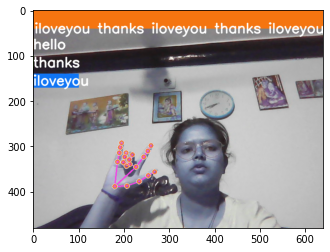

In [83]:

plt.imshow(prob_viz(res, actions, image, colors))

In [84]:
print(sentence)

['iloveyou', 'thanks', 'iloveyou', 'thanks', 'iloveyou']


In [89]:
sequence = []
sentence = []
threshold = 0.8
cap = cv2.VideoCapture(0)


with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        
        print(results)
    
        draw_styled_landmarks(image, results)
        
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-50:]
        
        
        if len(sequence) == 50:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:] 
                
            
        
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,50), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
 
        
        cv2.imshow('SLR CAM', image)


        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            

texttospc(sentence) 

cap.release()
cv2.destroyAllWindows()
    

    
 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

In [101]:
cap.release() 
cv2.destroyAllWindows()